### No Noise Data

#### No Noise Data (Training)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [48]:
file_path = 'cf_train_no_noise.csv'
file_path_test = 'cf_test_no_noise.csv'
data = pd.read_csv(file_path)
data_test = pd.read_csv(file_path_test)
data.head()

,Open_n_val,High_n_val,Low_n_val,Close_n_val,Volume_n_val,SMA_10_val,SMA_20_val,CMO_14_val,High_n-Low_n_val,Open_n-Close_n_val,...,Close_n_slope_3_changelen_val,Close_n_slope_5_changelen_val,Close_n_slope_10_changelen_val,row_num,day,era,target_10_val,target_5_val,sigma,day_no
0,0.50,0.50,0.50,0.50,0.0,0.25,0.25,0.5,0.25,1.00,...,0.50,0.50,0.50,75,540,12,0.25,0.00,_0_0_,0
1,0.50,0.50,0.50,0.50,0.0,0.25,0.25,0.5,0.50,0.75,...,0.50,0.50,0.50,76,540,12,0.25,0.00,_0_0_,0
2,0.50,0.50,0.50,0.50,0.0,0.50,0.25,0.5,0.50,0.75,...,0.25,0.25,0.25,77,540,12,0.25,0.25,_0_0_,0
3,0.50,0.50,0.25,0.25,0.0,0.50,0.25,0.5,0.50,0.75,...,0.25,0.25,0.25,78,540,12,0.25,0.25,_0_0_,0
4,0.25,0.25,0.25,0.25,0.0,0.50,0.25,0.5,0.50,0.75,...,0.50,0.25,0.25,79,540,12,0.75,0.25,_0_0_,0


In [49]:
unnecessary_columns = ['row_num', 'day', 'era', 'target_10_val', 'target_5_val', 'sigma', 'day_no']
split_point = int(len(data) * 0.8)
train_data = data[:split_point]
test_data = data[split_point:]
X_train = train_data.drop(columns=unnecessary_columns)
y_train = to_categorical((train_data['target_10_val']*4).astype(int))
X_test = test_data.drop(columns=unnecessary_columns)
y_test = to_categorical((test_data['target_10_val']*4).astype(int))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [50]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=6, mode='max', restore_best_weights=True)

In [51]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 output units for 5 classes

/Users/maksimchowdhary/.pyenv/versions/3.9.15/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 1, 50)          │        15,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,005 (148.46 KB)

 Trainable params: 38,005 (148.46 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
y_train

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [54]:
y_test

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [55]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1, shuffle=False, callbacks=[early_stopping])

Epoch 1/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6502 - loss: 0.9339 - val_accuracy: 0.8645 - val_loss: 0.3741
Epoch 2/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.8514 - loss: 0.4026 - val_accuracy: 0.8962 - val_loss: 0.2678
Epoch 3/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 0.8819 - loss: 0.3148 - val_accuracy: 0.9160 - val_loss: 0.2108
Epoch 4/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9002 - loss: 0.2639 - val_accuracy: 0.9332 - val_loss: 0.1761
Epoch 5/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9116 - loss: 0.2319 - val_accuracy: 0.9411 - val_loss: 0.1510
Epoch 6/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9195 - loss: 0.2059 - val_accuracy: 0.9457 - val_loss: 0.1368
Epoch 7/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.9281 - loss: 0.1826 - val_accuracy: 0.9541 - val_loss: 0.1224
Epoch 8/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.9322 -

In [56]:
model.evaluate(X_test_scaled, y_test, verbose=0)

[0.04669535160064697, 0.978044867515564]

#### No Noise Data (Results)

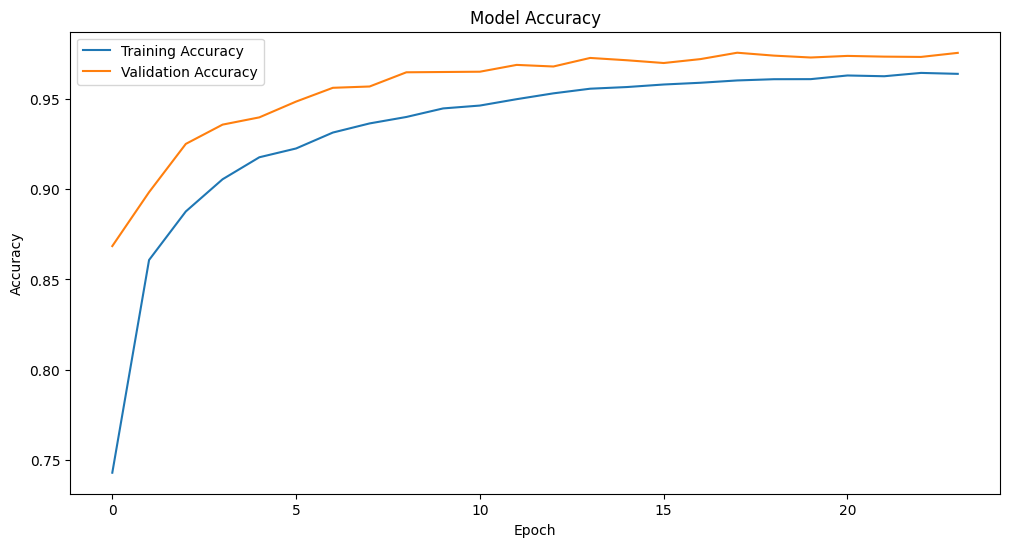

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [57]:
X_test = data_test.drop(columns=unnecessary_columns)
unnecessary_columns = ['row_num', 'day', 'era', 'target_10_val', 'target_5_val', 'sigma', 'day_no']
X_test_scaled = scaler.transform(X_test)
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
y_test = to_categorical((data_test['target_10_val']*4).astype(int))
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1950/1950 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.7667 - loss: 1.9897
Test Loss: 1.9917306900024414
Test Accuracy: 0.7666186094284058


### Noisy data

#### Noisy data (Training)

In [ ]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [67]:
file_path = 'cf_train.csv'
file_path_test = 'cf_test.csv'
data = pd.read_csv(file_path)
data_test = pd.read_csv(file_path_test)
data.head()

,Open_n_val,High_n_val,Low_n_val,Close_n_val,Volume_n_val,SMA_10_val,SMA_20_val,CMO_14_val,High_n-Low_n_val,Open_n-Close_n_val,...,Close_n_slope_3_changelen_val,Close_n_slope_5_changelen_val,Close_n_slope_10_changelen_val,row_num,day,era,target_10_val,target_5_val,sigma,day_no
0,1.0,0.75,1.0,0.5,0.0,1.0,1.0,0.00,0.00,1.00,...,0.25,0.25,0.00,75,550,12,1.00,1.00,_0.075_0.05_,0
1,1.0,1.00,1.0,1.0,0.0,1.0,1.0,0.75,0.50,0.75,...,0.50,0.50,0.50,76,550,12,0.75,0.75,_0.075_0.05_,0
2,1.0,1.00,1.0,1.0,0.0,1.0,1.0,0.25,0.00,0.75,...,0.25,0.25,0.25,77,550,12,1.00,1.00,_0.075_0.05_,0
3,1.0,1.00,1.0,1.0,0.0,1.0,1.0,1.00,0.25,0.00,...,0.50,0.50,0.50,78,550,12,0.25,0.00,_0.075_0.05_,0
4,1.0,1.00,1.0,1.0,0.0,1.0,1.0,1.00,0.00,0.00,...,0.25,0.50,0.50,79,550,12,0.00,0.00,_0.075_0.05_,0


In [68]:
unnecessary_columns = ['row_num', 'day', 'era', 'target_10_val', 'target_5_val', 'sigma', 'day_no']
split_point = int(len(data) * 0.8)
train_data = data[:split_point]
test_data = data[split_point:]
X_train = train_data.drop(columns=unnecessary_columns)
y_train = to_categorical((train_data['target_10_val']*4).astype(int))
X_test = test_data.drop(columns=unnecessary_columns)
y_test = to_categorical((test_data['target_10_val']*4).astype(int))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [70]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=6, mode='max', restore_best_weights=True)

In [71]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 output units for 5 classes

/Users/maksimchowdhary/.pyenv/versions/3.9.15/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 1, 50)          │        15,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,005 (148.46 KB)

 Trainable params: 38,005 (148.46 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1, shuffle=False, callbacks=[early_stopping])

Epoch 1/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4440 - loss: 1.2978 - val_accuracy: 0.5582 - val_loss: 1.0530
Epoch 2/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5460 - loss: 1.0783 - val_accuracy: 0.5700 - val_loss: 1.0053
Epoch 3/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 973us/step - accuracy: 0.5613 - loss: 1.0369 - val_accuracy: 0.5781 - val_loss: 0.9779
Epoch 4/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5681 - loss: 1.0080 - val_accuracy: 0.5867 - val_loss: 0.9583
Epoch 5/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5751 - loss: 0.9857 - val_accuracy: 0.5937 - val_loss: 0.9429
Epoch 6/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.5840 - loss: 0.9718 - val_accuracy: 0.5960 - val_loss: 0.9326
Epoch 7/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5883 - loss: 0.9643 - val_accuracy: 0.6013 - val_loss: 0.9227
Epoch 8/100
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5928 - los

In [74]:
model.evaluate(X_test_scaled, y_test, verbose=0)

[0.8229451775550842, 0.6473557949066162]

#### Noisy data (Results)

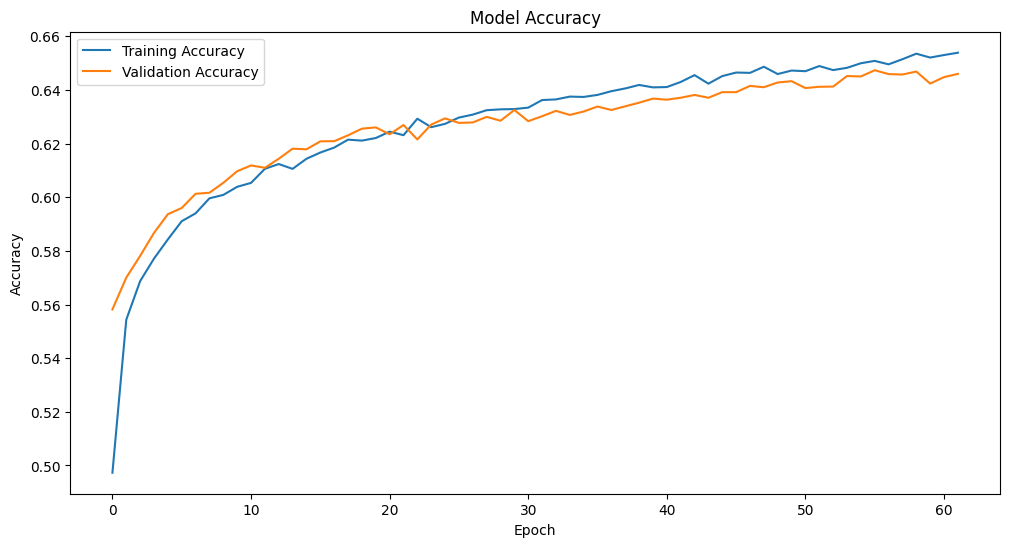

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [76]:
X_test = data_test.drop(columns=unnecessary_columns)
unnecessary_columns = ['row_num', 'day', 'era', 'target_10_val', 'target_5_val', 'sigma', 'day_no']
X_test_scaled = scaler.transform(X_test)
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
y_test = to_categorical((data_test['target_10_val']*4).astype(int))
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1950/1950 ━━━━━━━━━━━━━━━━━━━━ 1s 372us/step - accuracy: 0.5363 - loss: 1.1719
Test Loss: 1.1620591878890991
Test Accuracy: 0.5372756123542786
